In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Teso Corpus Dataset
dataset = pd.read_csv("Teso Corpus Dataset.csv")

In [3]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    dataset["Teso Words"],  # Input features
    dataset["Part of Speech"],  # Target variable
    test_size=0.2,  # 20% for testing
    random_state=42
)

In [4]:
# Initialize and fit the CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

In [5]:
# Train the model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [6]:
# Transform test data using the trained vectorizer
X_test_vec = vectorizer.transform(X_test)

In [7]:
# Predict the test data
y_pred = model.predict(X_test_vec)

In [8]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

In [9]:
# Print the performance metrics
print("Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Performance Metrics:
Accuracy: 0.8613138686131386
Precision: 0.8811261730969759
Recall: 0.8613138686131386
F1 Score: 0.8175182481751825


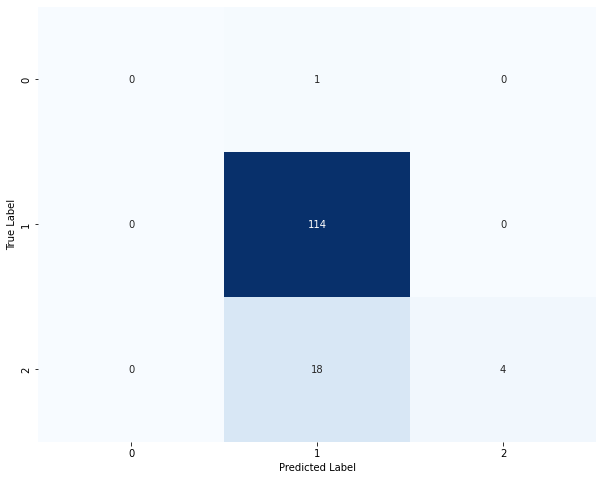

In [10]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [11]:
# Prompt user for input word
input_word = input("Enter a word to test if it's an Iteso word: ")

# Transform the input word
input_word_vec = vectorizer.transform([input_word])

# Predict the input word
prediction = model.predict(input_word_vec)[0]

# Print the prediction result
print("Prediction Result:")
print("Input Word:", input_word)
print("Is Iteso Word:", prediction)

#Input Test Word: Apese

Enter a word to test if it's an Iteso word: Apese
Prediction Result:
Input Word: Apese
Is Iteso Word: noun
